<a href="https://colab.research.google.com/github/jocinenabwire/FINANCIAL-INCLUSION/blob/main/Jocine_Nabwire_Financial_Inclusion_Week_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEEK TWO IP**

## 1. Defining the Question

### a) Specifying the Question

> Predict which individuals are most likely to have or use a bank account

### b) Defining the Metric for Success

> Using the other factors provided, we should be able to get which of those are highly likely to affect people having bank accounts.

### c) Understanding the context 

> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

> The following steps were taken:

1. Business Understanding
2. Reading the data
3. Data Understanding
4. Data cleaning
5. Implementing the solution
6. Challenging the solution

### e) Data Relevance

> The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

## 2. Reading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


The data was derived from

In [2]:
# Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/FinancialDataset
#
financial_df=pd.read_csv('http://bit.ly/FinancialDataset')

In [3]:
#checking the top of our data
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
#checking the bottom of our data
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [5]:
#loading the variable definitions
variable_dfns=pd.read_csv('http://bit.ly/VariableDefinitions')
variable_dfns.head(13)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


## 3. Data Understanding

In [6]:
# Determining the no. of records in our dataset
#
financial_df.shape

(23524, 13)

The dataframe has 23,524 rows and 13 columns.

In [7]:
# Checking whether each column has an appropriate datatype
#
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


All columns are of object datatype apart from year which is interger and household size and respondent age which are in float datatype.

In [8]:
#getting the basic statistical details
financial_df.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_409,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [9]:
#looking for duplicates
financial_df.duplicated(keep=False).sum()

0

There are no duplicates.

## 4. Data Cleaning

> This done by following the data integrity rules i.e Validity, Accuracy, Completeness, Consistency, Uniformity to ensure the data is ready for analysis

### Validity

In [10]:
#checking the columns
financial_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [11]:
#renaming the columns
financial_df1=financial_df.rename(columns={'country':'Country','year':'Year','uniqueid':'Unique ID','Has a Bank account':'Bank A/C','Type of Location':'Location','household_size':'Household Size',
                             'Respondent Age':'Age','gender_of_respondent':'Gender','The relathip with head':'Relationship With Head',
                             'marital_status':'Marital Status','Level of Educuation':'Education Level'})
financial_df1.head()

,Country,Year,Unique ID,Bank A/C,Location,Cell Phone Access,Household Size,Age,Gender,Relationship With Head,Marital Status,Education Level,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [12]:
#checking the renamed columns
financial_df1.columns

Index(['Country', 'Year', 'Unique ID', 'Bank A/C', 'Location',
       'Cell Phone Access', 'Household Size', 'Age', 'Gender',
       'Relationship With Head', 'Marital Status', 'Education Level',
       'Type of Job'],
      dtype='object')

The columns have been renamed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


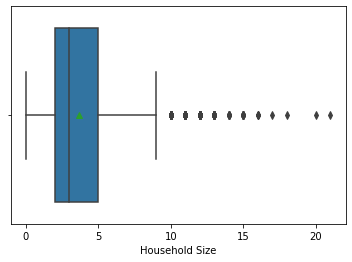

In [13]:
#checking for outliers
#
#Household Size Column
sns.boxplot(financial_df1['Household Size'],showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


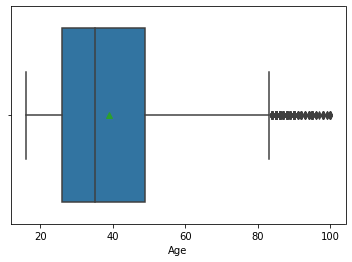

In [14]:
#Respondent Age Column
sns.boxplot(financial_df1['Age'],showmeans=True)

Did not drop the outliers since they represent real time data which if removed will affect the data analysis.

### Completeness

In [15]:
#checking for missing values
financial_df1.isnull().sum()

Country                   14
Year                       0
Unique ID                  0
Bank A/C                  36
Location                  15
Cell Phone Access         11
Household Size            28
Age                       34
Gender                    34
Relationship With Head     4
Marital Status            32
Education Level           29
Type of Job               30
dtype: int64

All columns apart from year and unique id have missing values.

In [16]:
#Dropping all missing values
#We drop them since they are not many and they will not affect our analysis.
financial_df2 =financial_df1.dropna()
financial_df2.head()

,Country,Year,Unique ID,Bank A/C,Location,Cell Phone Access,Household Size,Age,Gender,Relationship With Head,Marital Status,Education Level,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [17]:
#checking if there are any missing values
financial_df2.isnull().sum()

Country                   0
Year                      0
Unique ID                 0
Bank A/C                  0
Location                  0
Cell Phone Access         0
Household Size            0
Age                       0
Gender                    0
Relationship With Head    0
Marital Status            0
Education Level           0
Type of Job               0
dtype: int64

All missing values have been successfully dropped.

### Consistency

In [18]:
#checking for duplicates
financial_df2.duplicated().sum()

0

There are no duplicates.

### Uniformity

In [19]:
#changing year to datetime datatype
financial_df1['Year'] = pd.to_datetime(financial_df1['Year'])
financial_df1['Year'].head()

0   1970-01-01 00:00:00.000002018
1   1970-01-01 00:00:00.000002018
2   1970-01-01 00:00:00.000002018
3   1970-01-01 00:00:00.000002018
4   1970-01-01 00:00:00.000002018
Name: Year, dtype: datetime64[ns]

> Checking for unique values in each column

In [20]:
#Country
financial_df2['Country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

4 unique values

In [21]:
#Year
financial_df2['Year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

6 unique values.

The data was collected between 2016 and 2018, therefore, 2029, 2039 and 2056 can be termed as anomalies.

In [22]:
#Unique ID
financial_df2['Unique ID'].unique()

array(['uniqueid_1', 'uniqueid_2', 'uniqueid_3', ..., 'uniqueid_8757',
       'uniqueid_8758', 'uniqueid_8759'], dtype=object)

In [23]:
len(financial_df2['Unique ID'].unique())

8687

8687 unique values.

In [24]:
#Bank A/C
financial_df2['Bank A/C'].unique()

array(['Yes', 'No'], dtype=object)

2 unique values.

In [25]:
#Location
financial_df2['Location'].unique()

array(['Rural', 'Urban'], dtype=object)

2 unique values.

In [26]:
#Cell Phone Access 
financial_df2['Cell Phone Access'].unique()

array(['Yes', 'No'], dtype=object)

2 unique values.

In [27]:
#Household Size 
financial_df2['Household Size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21.,  0., 18., 17., 20.])

In [28]:
len(financial_df2['Household Size'].unique())

21

21 unique values.

0 cannot be ahousehold size since a 0-person household is a vacant unit, and is not considered a “household.” The term household only applies to occupied units, therefore, it can be termed as an anomaly.

In [29]:
#Age
financial_df2['Age'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [30]:
len(financial_df2['Age'].unique())

85

85 unique values.

In [31]:
#Gender
financial_df2['Gender'].unique()

array(['Female', 'Male'], dtype=object)

2 unique values.

In [32]:
#Relationship with head
financial_df2['Relationship With Head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

6 unique values.

In [33]:
#Marital status
financial_df2['Marital Status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

5 unique values.

In [34]:
#Education level
financial_df2['Education Level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

7 unique values.

Education is an ordinal data type and cannot have 6 as an educational level, therefore, the 6 is an anomaly.

In [35]:
#Type of job
financial_df2['Type of Job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [36]:
len(financial_df2['Type of Job'].unique())

10

10 unique values.

> Dealing with the anomalies

In [37]:
financial_df3=financial_df2.drop([2029, 2039, 2056], inplace = True);

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
#checking for unique values in year column
financial_df3['Year'].unique()

TypeError: ignored

There are no duplicates.

## Univariate Analysis

#### Measures of Central Tendency

In [39]:
#Mean
financial_df2['Age'].mean()

38.80595544130249

In [40]:
financial_df2['Household Size'].mean()

3.688731790916881

In [41]:
#Median
financial_df2['Age'].median()

35.0

In [42]:
financial_df2['Household Size'].median()

3.0

In [43]:
#Mode
financial_df2['Age'].mode()

0    30.0
dtype: float64

In [44]:
financial_df2['Household Size'].mode()

0    2.0
dtype: float64

#### Measures of Dispersion/Variability

In [45]:
#Standard Deviation
financial_df2['Age'].std()

16.5187398981227

In [46]:
financial_df2['Household Size'].std()

2.2812604249402306

In [47]:
#Variance
financial_df2['Age'].var()

272.8687678218307

In [49]:
financial_df1['Household Size'].var()

5.198096306757275

In [48]:
#Range
financial_df2_max = financial_df2['Age'].max()
financial_df2_min = financial_df2['Age'].min()
financial_df2_max-financial_df2_min

84.0

In [50]:
financial_df2_max1=financial_df2['Household Size'].max()
financial_df2_min1=financial_df2['Household Size'].min()
financial_df2_max1-financial_df2_min1

21.0

In [51]:
#Quantiles
financial_df2['Age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: Age, dtype: float64

In [52]:
financial_df2['Household Size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: Household Size, dtype: float64

In [53]:
#Skewness
financial_df2['Age'].skew()

0.8407634600906067

The right side tail is bigger than the left thus the mean is greater than the mode showing it's positively skewed.

In [54]:
financial_df2['Household Size'].skew()

0.9740455954607845

The right side tail is bigger than the left thus the mean is greater than the mode showing it's positively skewed.

In [55]:
#Kurtosis
financial_df2['Age'].kurt()

0.09895431666376275

Leptokurtic since the kurtosis is higher than that of the normal distribution. Ouliers are also present.

In [56]:
financial_df2['Household Size'].kurt()

1.1536613285493758

Leptokurtic since the kurtosis is higher than that of the normal distribution. Ouliers are also present.

#### Frequency Tables

In [ ]:
#country
financial_df2.Country.value_counts()


Rwanda      8684
Tanzania    6500
Kenya       6061
Uganda      2095
Name: Country, dtype: int64

Rwanda has the most respondents.

In [ ]:
#gender
financial_df2.Gender.value_counts()

Female    13765
Male       9575
Name: Gender, dtype: int64

Majority of the respondents were females.

In [ ]:
#location
financial_df2.Location.value_counts()

Rural    14262
Urban     9078
Name: Location, dtype: int64

Most of the respondents were from the rural region.

#### Histograms

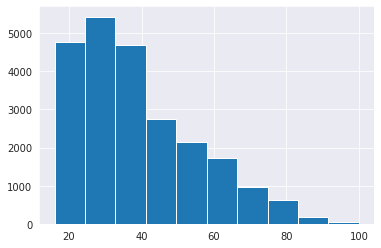

In [58]:
financial_df2['Age'].hist()

Shows the data is positively skewed.

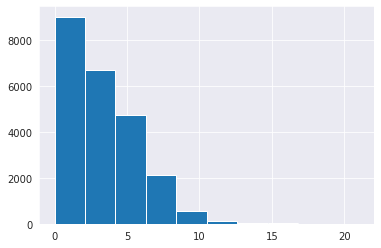

In [59]:
financial_df2['Household Size'].hist()

Shows the data is positively skewed.

#### Pie Chart

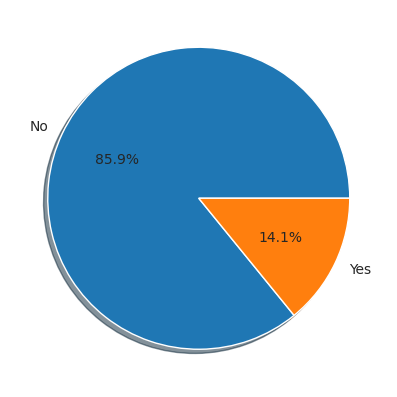

In [61]:
#Pie chart for the bank account column
bank_accounts=financial_df2['Bank A/C'].value_counts()
labels=bank_accounts.index
values=bank_accounts.values

plt.figure(figsize=(5,5),dpi=100)
plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True)
plt.show()

No were more compared to the yes.

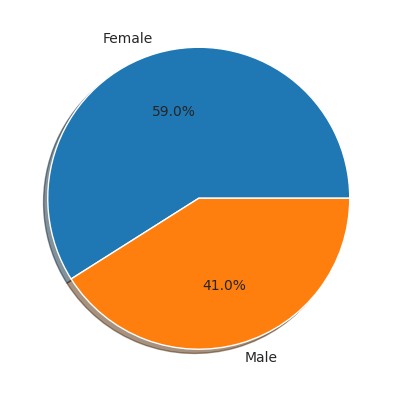

In [62]:
#Pie chart for the gender column
bank_accounts=financial_df2['Gender'].value_counts()
labels=bank_accounts.index
values=bank_accounts.values

plt.figure(figsize=(5,5),dpi=100)
plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True)
plt.show()

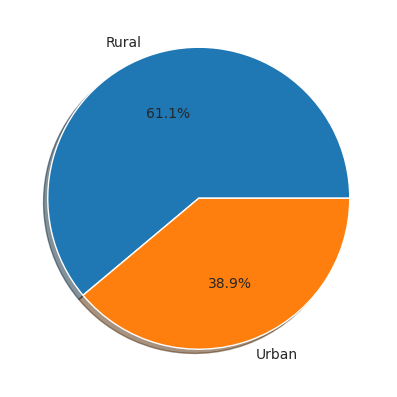

In [63]:
#Pie chart for the location column
bank_accounts=financial_df2['Location'].value_counts()
labels=bank_accounts.index
values=bank_accounts.values

plt.figure(figsize=(5,5),dpi=100)
plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True)
plt.show()

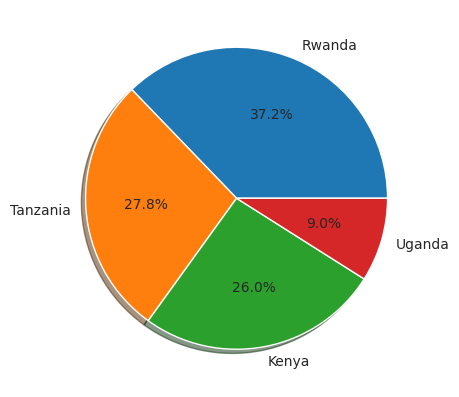

In [64]:
#Pie chart for the country column
bank_accounts=financial_df2['Country'].value_counts()
labels=bank_accounts.index
values=bank_accounts.values

plt.figure(figsize=(5,5),dpi=100)
plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True)
plt.show()

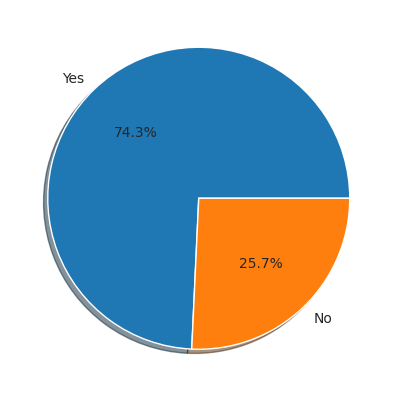

In [65]:
#Pie chart for the education level column
bank_accounts=financial_df2['Cell Phone Access'].value_counts()
labels=bank_accounts.index
values=bank_accounts.values

plt.figure(figsize=(5,5),dpi=100)
plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True)
plt.show()

## Bivariate Analysis

#### Bar Charts

In [67]:
#bar graph for the number of respondents per country.
plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(financial_df2.country)
plt.title('Number of Respondents by Country', color = 'black')
plt.show()

AttributeError: ignored

<Figure size 600x400 with 0 Axes>

Rwanda has more respondents.

#### Line Charts

In [68]:
#plotting the line graph
financial_df2.plot( x = 'year' , y = 'household_size')
#title
plt.title("Year vs Household Size", fontsize=14, y=1.015)
# Labelling the y-axis
plt.ylabel('Household Size')

# Labelling the x-axis
plt.xlabel('Year')

# Displaying our graph
plt.show()

KeyError: ignored

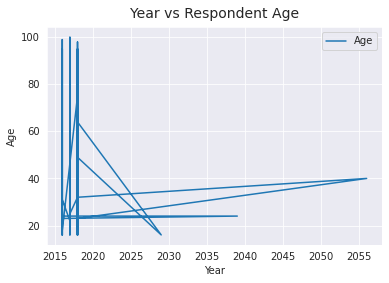

In [73]:
#plotting the line graph
financial_df2.plot( x = 'Year' , y = 'Age')
#title
plt.title("Year vs Respondent Age", fontsize=14, y=1.015)
# Labelling the y-axis
plt.ylabel('Age')

# Labelling the x-axis
plt.xlabel('Year')

# Displaying our graph
plt.show()

#### Scatter Plots

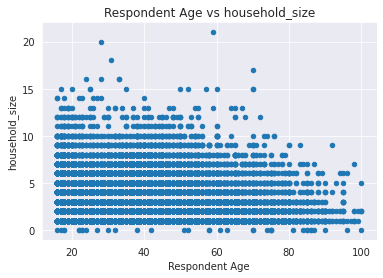

In [70]:
#Plotting our scatterplot to compare the variables
financial_df2.plot(x = 'Age', y = 'Household Size', kind='scatter')

# Giving our scatterplot a title
plt.title('Respondent Age vs household_size')

# Labelling our x axis
plt.xlabel('Respondent Age')

# Labelling our y axis
plt.ylabel('household_size')

# We then display our scatterplot as shown below
plt.show()

#### Correlation

In [74]:
# Calculating the pearson coefficient
pearson_coeff = financial_df2["Age"].corr(financial_df1["Household Size"], method="pearson") 
print(pearson_coeff)

-0.11967728759482292


In [ ]:
# Checking whether you have to define the pearson
coeff = financial_df1["Age"].corr(financial_df1["Household Size"]) 
print(coeff)

-0.11970919507762415


Age and household size are inversely related.

#### Stacked Column Chart

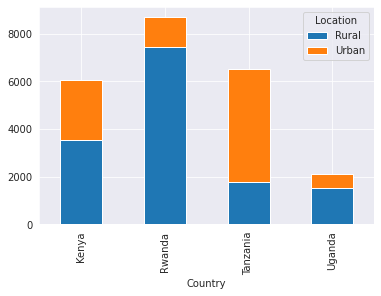

In [76]:
#For country and type of location
financial_df2.groupby(['Country', 'Location']).size().unstack().plot(kind='bar', stacked=True)

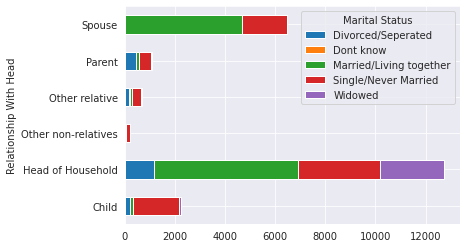

In [80]:
#relationship with head and marital status
financial_df2.groupby(['Relationship With Head', 'Marital Status']).size().unstack().plot(kind='barh', stacked=True)

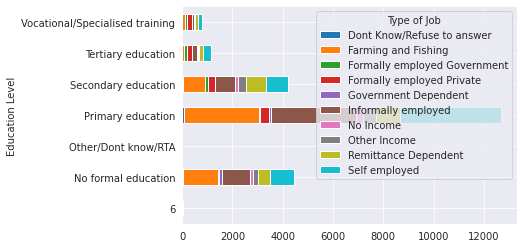

In [82]:
#level of job and type of education
financial_df2.groupby(['Education Level', 'Type of Job']).size().unstack().plot(kind='barh', stacked=True)

#### Crosstabs

In [ ]:
#gender 
gender=financial_df2['Gender']
account=financial_df2['Bank A/C']
gc= pd.crosstab(gender,account)
gc

Bank A/C,No,Yes
Gender,,
Female,12285,1480
Male,7758,1817


## Multivariate Analysis

#### Encoding

In [107]:
from sklearn.preprocessing import LabelEncoder
#encoding the object columns
columns = ['Country','Bank A/C', 'Location','Cell Phone Access','Gender','Relationship With Head','Marital Status','Education Level','Type of Job']
#
# we convert the categorical variables 
#
financial_df3_obj= financial_df2_obj[columns].apply(LabelEncoder().fit_transform)
#
# Print head
#
financial_df3_obj.head()

,Country,Bank A/C,Location,Cell Phone Access,Gender,Relationship With Head,Marital Status,Education Level,Type of Job
0,0,1,0,1,0,5,2,4,9
1,0,0,0,0,0,1,4,1,4
2,0,1,1,1,1,3,3,6,9
3,0,0,0,1,0,1,2,3,3
4,0,0,1,0,1,0,3,3,5


In [108]:
financial_df3_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Country                 23340 non-null  int64
 1   Bank A/C                23340 non-null  int64
 2   Location                23340 non-null  int64
 3   Cell Phone Access       23340 non-null  int64
 4   Gender                  23340 non-null  int64
 5   Relationship With Head  23340 non-null  int64
 6   Marital Status          23340 non-null  int64
 7   Education Level         23340 non-null  int64
 8   Type of Job             23340 non-null  int64
dtypes: int64(9)
memory usage: 2.4 MB


##### Using Principal Component Analysis

###### Results with 1 Principal Component

In [109]:
# Step 1: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
X = financial_df3_obj.drop('Bank A/C', 1)
y = financial_df3_obj['Bank A/C']

In [110]:
# Step 2: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
# Step 3: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [112]:
# Step 4: Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [113]:
# Step 5: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
explained_variance

array([0.22109104, 0.18508251, 0.16000717, 0.12419884, 0.09993877,
       0.08387423, 0.06976978, 0.05603765])

In [114]:
# Step 6: Applying PCA
# It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [115]:
# Step 7: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
explained_variance

array([0.22109104, 0.18508251, 0.16000717, 0.12419884, 0.09993877,
       0.08387423, 0.06976978, 0.05603765])

In [116]:
# Step 8: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [117]:
# Step 9: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [118]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[4026    0]
 [ 642    0]]
Accuracy 0.8624678663239075


With one principal compent we get an accuracy of 86.2%.

###### Results with 2 Principal Components

In [119]:
# Step 1: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task.
X = financial_df3_obj.drop('Country', 1)
y = financial_df3_obj['Bank A/C']

In [120]:
# Step 2: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [121]:
# Step 3: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
from sklearn.preprocessing import StandardScaler

In [122]:
# Step 4: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [123]:
# Step 5: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
# Step 6: Applying PCA
# It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [125]:
# Step 7: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
explained_variance

array([0.21737094, 0.1802186 , 0.16954998, 0.12348693, 0.09581267,
       0.08083929, 0.07464005, 0.05808153])

In [126]:
# Step 8: Results with 2 Principal Components
# Now let's try to evaluate classification performance of the random forest algorithm 
# with 2 principal components. 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [127]:
# Step 9: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [128]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3983   43]
 [ 196  446]]
Accuracy 0.9488003427592117


We get an accuracy of 94.88% using two principal components.

## Implementing the Solution

We get higher accuracy using two principal components.

## Challenging the Solution

#### Chi Square

In [ ]:
from scipy.stats import chi2_contingency

In [129]:
#installing biokitinfo
!pip install bioinfokit

     |████████████████████████████████| 84 kB 2.2 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56749 sha256=e37dde67e219ebe74dd57ccb0b9358b25796697998223d20d179cbefad97d4da
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=feb2c2253a90da71fe84cabb744b6acc518eb346c7f6a5d09b83eaee5360d570
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [130]:
#importing our libraries
from bioinfokit.analys import stat

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### Type of location and bank account

In [132]:
#Type of loacation and bank account crosstab
account=financial_df2['Bank A/C']
location=financial_df2['Location']
ctab1=pd.crosstab(account,location)
ctab1

Location,Rural,Urban
Bank A/C,,
No,12599,7444
Yes,1663,1634


In [134]:
#chi square test
res=stat()
res.chisq(df=ctab1)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       183.241  9.50081e-42
Log-likelihood     1       179.55   6.0778e-41



The p value for both is below 0.05 thus we reject the null hypothesis and conclude there is a relationship between the type of location and having a bank account.

##### Cell Phone Access and Bank Account

In [137]:
account=financial_df2['Bank A/C']
cellphone=financial_df2['Cell Phone Access']
ctab2=pd.crosstab(account,cellphone)
ctab2

Cell Phone Access,No,Yes
Bank A/C,,
No,5904,14139
Yes,104,3193


In [138]:
#chi square test
res=stat()
res.chisq(df=ctab2)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            1       1023.31  1.53965e-224
Log-likelihood     1       1397.23  8.38957e-306



The p value for both is below 0.05 thus we reject the null hypothesis and conclude there is a relationship between having access to a cell phone and having a bank account.

In [139]:
account=financial_df2['Bank A/C']
age=financial_df2['Age']
ctab3=pd.crosstab(account,age)
ctab3

Age,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,...,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Bank A/C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,455,464,561,438,585,425,503,504,479,668,498,486,617,422,867,382,581,440,431,695,365,353,439,316,558,270,338,310,209,478,218,252,269,221,368,180,238,211,194,254,...,120,120,142,116,261,104,111,109,78,242,81,82,78,54,138,63,50,75,50,106,21,35,31,18,53,22,14,22,15,27,5,7,3,5,15,3,1,6,2,5
Yes,5,10,21,28,36,44,57,76,80,117,113,80,125,92,176,80,126,86,84,136,91,79,112,54,125,44,106,58,43,83,43,46,50,37,78,33,40,37,39,40,...,19,21,24,12,30,14,13,19,9,31,13,15,12,8,10,9,6,7,7,18,3,5,2,2,2,3,1,2,1,1,0,0,1,0,3,0,0,0,0,0


##### Respondent Age and Bank Account

In [140]:
account=financial_df2['Bank A/C']
age=financial_df2['Age']
ctab3=pd.crosstab(account,age)
ctab3

Age,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,...,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Bank A/C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,455,464,561,438,585,425,503,504,479,668,498,486,617,422,867,382,581,440,431,695,365,353,439,316,558,270,338,310,209,478,218,252,269,221,368,180,238,211,194,254,...,120,120,142,116,261,104,111,109,78,242,81,82,78,54,138,63,50,75,50,106,21,35,31,18,53,22,14,22,15,27,5,7,3,5,15,3,1,6,2,5
Yes,5,10,21,28,36,44,57,76,80,117,113,80,125,92,176,80,126,86,84,136,91,79,112,54,125,44,106,58,43,83,43,46,50,37,78,33,40,37,39,40,...,19,21,24,12,30,14,13,19,9,31,13,15,12,8,10,9,6,7,7,18,3,5,2,2,2,3,1,2,1,1,0,0,1,0,3,0,0,0,0,0


In [141]:
#chi square test
res=stat()
res.chisq(df=ctab3)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson           84       459.316  4.22331e-53
Log-likelihood    84       560.433  1.56547e-71



The p value for both is below 0.05 thus we reject the null hypothesis and conclude there is a relationship between respondent age phone and having a bank account.

In [142]:
financial_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 23340 non-null  object 
 1   Year                    23340 non-null  int64  
 2   Unique ID               23340 non-null  object 
 3   Bank A/C                23340 non-null  object 
 4   Location                23340 non-null  object 
 5   Cell Phone Access       23340 non-null  object 
 6   Household Size          23340 non-null  float64
 7   Age                     23340 non-null  float64
 8   Gender                  23340 non-null  object 
 9   Relationship With Head  23340 non-null  object 
 10  Marital Status          23340 non-null  object 
 11  Education Level         23340 non-null  object 
 12  Type of Job             23340 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 3.1+ MB


##### Gender of respondent and Bank Account

In [143]:
account=financial_df2['Bank A/C']
gender=financial_df2['Gender']
ctab4=pd.crosstab(account,gender)
ctab4

Gender,Female,Male
Bank A/C,,
No,12285,7758
Yes,1480,1817


In [144]:
#chi square test
res=stat()
res.chisq(df=ctab4)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       314.215  2.63594e-70
Log-likelihood     1       308.924  3.74733e-69



### Follow-up Questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

#### a). Did we have the right data?

> Yes

#### b). Do we need other data to answer our question?

> No

#### c). Did we have the right question?

> Yes